# Problem Statement:
**You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

**Heart Disease Dataset:
UCI Heart Disease Dataset


**Tasks To Be Performed:
**1. Data Analysis:
a. Import the dataset
b. Get information about the dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data_info = df.describe()
print("\ndata_info:")
print(data_info)
print("***********************************")

correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


data_info:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.5258

**2. Data Visualization:
a. Visualize the number of patients having a heart disease and not having
a heart disease
b. Visualize the age and whether a patient has disease or not
c. Visualize correlation between all features using a heat map

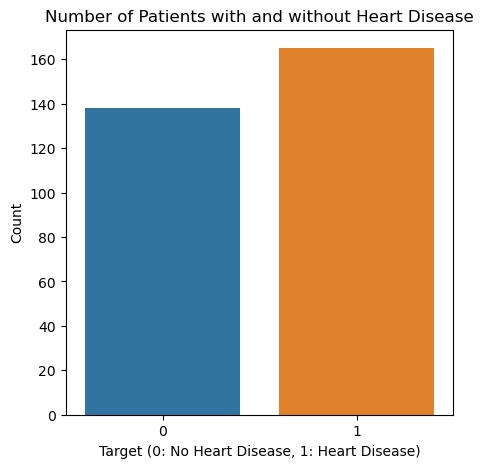

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='target' , data=df)
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.show()

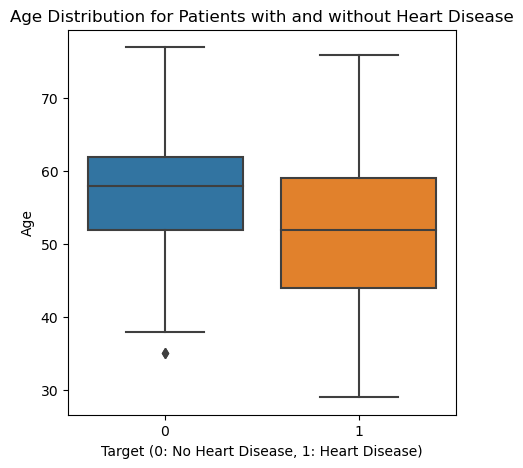

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(x='target', y ='age' , data=df)
plt.title('Age Distribution for Patients with and without Heart Disease')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Age')
plt.show()

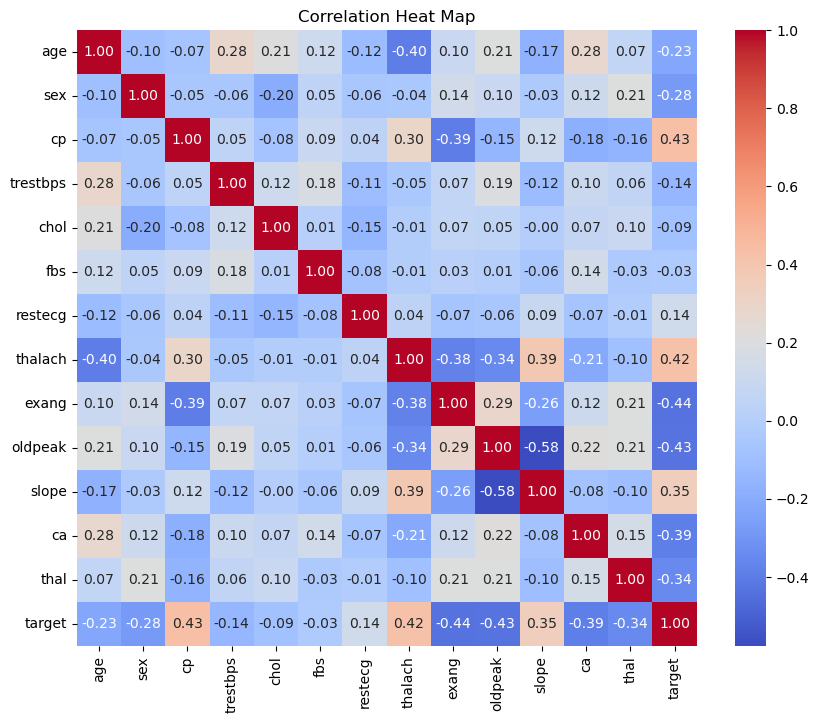

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

**3. Logistic Regression:
a. Build a simple logistic regression model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score


In [14]:
X=df.drop('target' , axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.3 , random_state= 2)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(y_pred)

confusion_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:")
print(confusion_mat)

print("\nAccuracy Score:", accuracy)

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1]
Confusion Matrix:
[[33  8]
 [ 2 48]]

Accuracy Score: 0.8901098901098901


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4. Decision Tree:
a. Build a decision tree model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the decision tree using the Graphviz package

In [15]:
pip install graphviz

In [21]:
from sklearn.tree import  export_graphviz
from sklearn.tree import DecisionTreeClassifier , export_text 
import graphviz

X=df.drop('target' , axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.3 , random_state= 2)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(y_pred)

confusion_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:")
print(confusion_mat)

print("\nAccuracy Score:", accuracy)


dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("heart_attack_decision_tree")  # This will save the decision tree visualization as a PDF file

[1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1]
Confusion Matrix:
[[30 11]
 [ 3 47]]

Accuracy Score: 0.8461538461538461


'heart_attack_decision_tree.pdf'

**5. Random Forest:
a. Build a Random Forest model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the model using the Graphviz package


In [24]:
from sklearn.ensemble import RandomForestClassifier

X=df.drop('target' , axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.3 , random_state= 2)

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(y_pred)

confusion_mat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:")
print(confusion_mat)

print("\nAccuracy Score:", accuracy)


dot_data = export_graphviz(model.estimators_[0], out_file=None, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'],
                           filled=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("heart_attack_Random_Forest")  # This will save the decision tree visualization as a PDF file

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1]
Confusion Matrix:
[[34  7]
 [ 4 46]]

Accuracy Score: 0.8791208791208791


'heart_attack_Random_Forest.pdf'

**6. Select the best model
a. Print the confusion matrix of all classifiers
b. Print the classification report of all classifiers
c. Calculate Recall Precision and F1 score of all the models
d. Visualize confusion matrix using heatmaps
e. Select the best model based on the best accuracies


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Confusion Matrix:
[[32  9]
 [ 8 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Recall: 0.84, Precision: 0.82, F1-score: 0.83

Model: Decision Tree
Confusion Matrix:
[[32  9]
 [15 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91


Recall: 0.70, Precision: 0.80, F1-score: 0.74

Model: Random Forest
Confusion Matrix:
[[33  8]
 [ 8 42]]

Classification Report

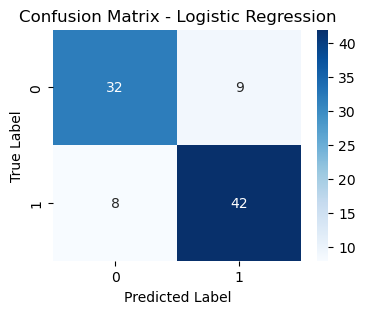

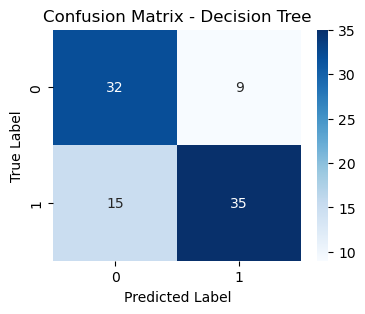

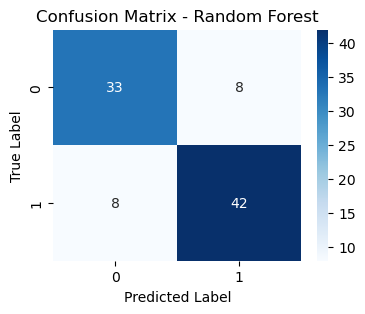

The best model is: Random Forest with an accuracy of 0.82


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

#  Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

#  Divide the dataset into 70:30 ratio (train:test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Build the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

#  Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#  Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#  Predict values on the test set for all models
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

#  Evaluate the models
models = [logreg_model, dt_model, rf_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    
    print(f"Model: {model_names[i]}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate Recall, Precision, and F1-score
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nRecall: {recall:.2f}, Precision: {precision:.2f}, F1-score: {f1:.2f}\n")

#  Visualize confusion matrix using heatmaps
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_matrix, title=f"Confusion Matrix - {model_names[i]}")

# Step 10: Select the best model based on the best accuracies
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]

print(f"The best model is: {best_model_name} with an accuracy of {max(accuracies):.2f}")
